In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

In [2]:
df = pd.read_csv('glass.csv')

In [3]:
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [5]:
df.shape

(214, 10)

In [6]:
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [8]:
df.duplicated().value_counts()

False    213
True       1
dtype: int64

In [9]:
data = df.drop_duplicates()

In [10]:
data.duplicated().value_counts()

False    213
dtype: int64

In [11]:
data.isna().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [12]:
data.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [15]:
corr = data.corr()

<Axes: >

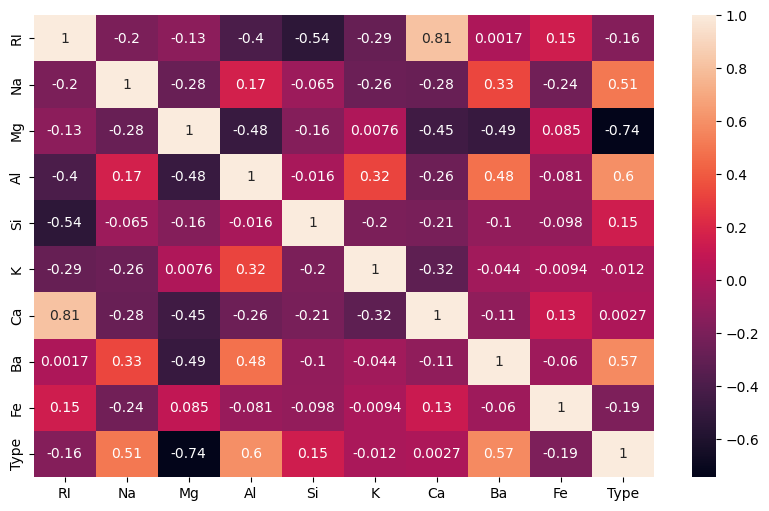

In [20]:
plt.figure(figsize=(10,6))
sns.heatmap(corr,annot=True)

<Axes: xlabel='RI', ylabel='Na'>

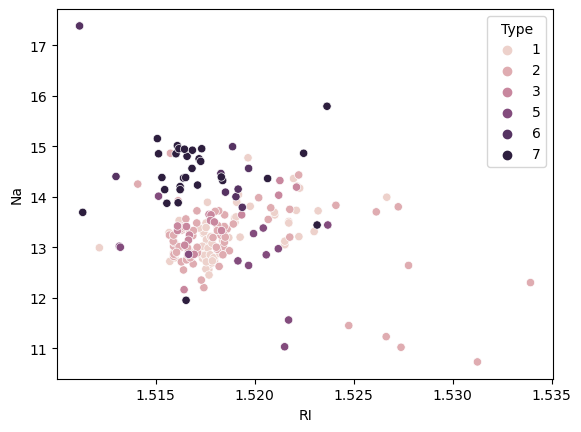

In [25]:
sns.scatterplot(x=data['RI'],y=data['Na'], hue=df['Type'])

In [42]:
preft = data.drop('Type', axis=1)

In [43]:
preft

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0
...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0


In [44]:
tt = data['Type']

In [45]:
tt

0      1
1      1
2      1
3      1
4      1
      ..
209    7
210    7
211    7
212    7
213    7
Name: Type, Length: 213, dtype: int64

In [64]:
from sklearn.preprocessing import StandardScaler

In [65]:
st = StandardScaler()

In [66]:
ft = st.fit_transform(preft)

In [69]:
ft = pd.DataFrame(ft, columns=preft.columns)

In [70]:
ft

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,0.879840,0.289558,1.257238,-0.706370,-1.133248,-0.673480,-0.143466,-0.353808,-0.588301
1,-0.243816,0.596403,0.639311,-0.180863,0.097037,-0.028962,-0.790201,-0.353808,-0.588301
2,-0.716412,0.154546,0.604596,0.182950,0.433746,-0.167073,-0.825349,-0.353808,-0.588301
3,-0.227291,-0.238216,0.701798,-0.322346,-0.058368,0.109149,-0.516041,-0.353808,-0.588301
4,-0.306608,-0.164573,0.653197,-0.423405,0.550299,0.078457,-0.621487,-0.353808,-0.588301
...,...,...,...,...,...,...,...,...,...
208,-0.699888,0.903249,-1.860172,2.891336,-0.058368,-0.642789,0.158812,1.778672,-0.588301
209,-0.494986,1.860605,-1.860172,1.092483,0.524398,-0.765554,-0.389506,2.844912,-0.588301
210,0.760865,1.173272,-1.860172,1.153118,0.990612,-0.765554,-0.361387,2.945501,-0.588301
211,-0.607351,1.197820,-1.860172,0.991424,1.236668,-0.765554,-0.333268,2.804676,-0.588301


In [188]:
x_train,x_test,y_train,y_test= train_test_split(ft,tt, test_size=0.4,random_state=100)

In [189]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(127, 9)
(86, 9)
(127,)
(86,)


In [201]:
kn = KNeighborsClassifier(n_neighbors=4)
kn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=4)

In [202]:
ypred = kn.predict(x_test)
ypred

array([1, 1, 2, 2, 2, 1, 5, 2, 7, 2, 1, 1, 1, 1, 7, 1, 1, 2, 2, 2, 2, 7,
       1, 1, 2, 3, 2, 2, 1, 7, 2, 1, 7, 1, 2, 2, 2, 1, 6, 5, 1, 1, 2, 2,
       1, 1, 7, 2, 2, 1, 1, 2, 7, 2, 1, 1, 1, 7, 1, 7, 1, 2, 1, 2, 2, 2,
       2, 2, 2, 7, 6, 7, 2, 1, 7, 2, 2, 1, 1, 2, 7, 1, 2, 7, 1, 1],
      dtype=int64)

In [203]:
pd.crosstab(y_test,ypred)

col_0,1,2,3,5,6,7
Type,,,,,,
1,18,3,0,0,0,0
2,11,20,0,0,0,0
3,1,3,1,0,0,0
5,0,6,0,2,0,1
6,0,1,0,0,2,1
7,3,1,0,0,0,12


In [204]:
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score

In [205]:
accuracy_score(y_test,ypred)

0.6395348837209303

In [206]:
confusion_matrix(y_test,ypred)

array([[18,  3,  0,  0,  0,  0],
       [11, 20,  0,  0,  0,  0],
       [ 1,  3,  1,  0,  0,  0],
       [ 0,  6,  0,  2,  0,  1],
       [ 0,  1,  0,  0,  2,  1],
       [ 3,  1,  0,  0,  0, 12]], dtype=int64)

Text(50.722222222222214, 0.5, 'Predicted')

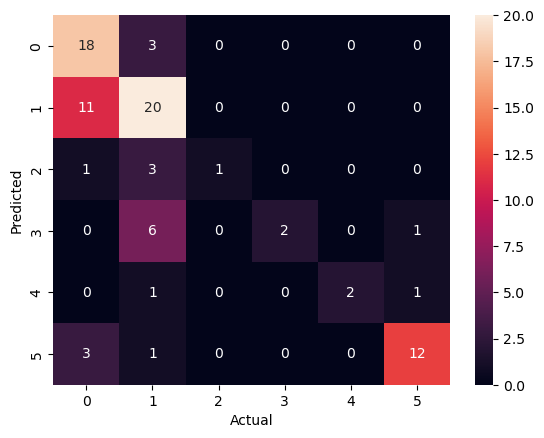

In [207]:
sns.heatmap(confusion_matrix(y_test,ypred),annot=True)
plt.xlabel('Actual')
plt.ylabel('Predicted')

In [208]:
params= {'n_neighbors':[1,2,3,4,5,6,7,8,9,10]}

In [209]:
grid_search= GridSearchCV(kn,params)

In [210]:
grid_search.fit(x_train,y_train)

C:\Users\Rathnavel\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:725: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


GridSearchCV(estimator=KNeighborsClassifier(n_neighbors=4),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]})

In [211]:
grid_search.best_params_

{'n_neighbors': 4}